In [1]:
%matplotlib inline
import random
import oommfc as oc
import discretisedfield as df

/Users/fangohr/anaconda3/envs/joommf/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Zeeman energy

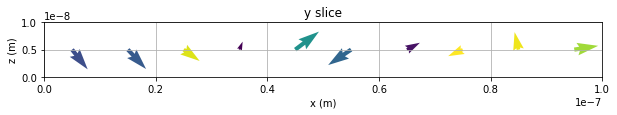

In [7]:

random.seed(9999)

p1 = (0, 0, 0)
p2 = (100e-9, 10e-9, 10e-9)
cell = (10e-9, 10e-9, 10e-9)

mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

def random_m(pos):
    mx = 2*random.random() - 1
    my = 2*random.random() - 1
    mz = 2*random.random() - 1
    return (mx, my, mz)

Ms = 8e6  # magnetisation saturation (A/m)
random_field = df.Field(mesh, value=random_m, norm=Ms)
random_field.plot_slice("y", 0);

In [8]:
H = (0, 0, 5e6)  # external magnetic field (A/m)
zeeman = oc.Zeeman(H=H)

system = oc.System(name="zeeman_tutorial")

gamma = 2.211e5  # gyrotropic ration
alpha = 0.5  # Gilbert damping

system.dynamics = oc.Precession(gamma=gamma) + oc.Damping(alpha=alpha)
system.hamiltonian = zeeman
system.m = random_field

2017/3/19 0:30: Calling OOMMF (zeeman_tutorial/zeeman_tutorial.mif) ... [1.3s]


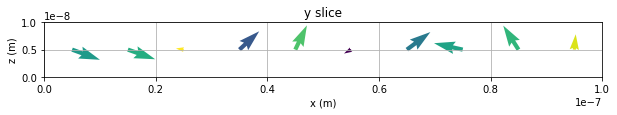

In [9]:
td = oc.TimeDriver()

td.drive(system, t=0.1e-9, n=100)

system.m.plot_slice("y", 0);

In [ ]:
# What is the raw data for m?
system.m.array

In [ ]:
system.m.array.mean(axis=0)/Ms

In [ ]:
system.dt['mz'][0:10]

In [ ]:
system.dt.plot('t', 'mz', style='o-')

I think we are plotting the *first* saved data point when calling `system.m.plot_slice`. We can work around the bug by increasing the integration time so that the system is already aligned at the first saved data point (say 1e-9s).

Or we can stop it from appearing by using `n=1` in `td.drive(sytsem, t=0.1e-9, n=1)`. However, in the that case, the plot of $m_x(t)$ cannot be drawn (because we haven't saved enough data).

It also appears that the bug appears only when we execute the cells in this notebook the second time (from the cell containing setting the random seed). Immediately after a notebook restart, all is working. (This may hint at a lost references when assigning the random field to `system.m`.)

(Secondary bug, maybe in OOMMF: we should also save the initial condition!).